In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../../dynamic_pricing.csv')

In [ ]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


Number_of_Drivers похоже имеет выбросы

In [ ]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
df.isna().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


In [ ]:
df.duplicated().sum()

np.int64(0)

По тепловой карте матрицы корреляции видим, что сильно коррелируют меджу собой number_of_drivers | number_of_riders и expected_ride_duration | historical_cost_of_ride

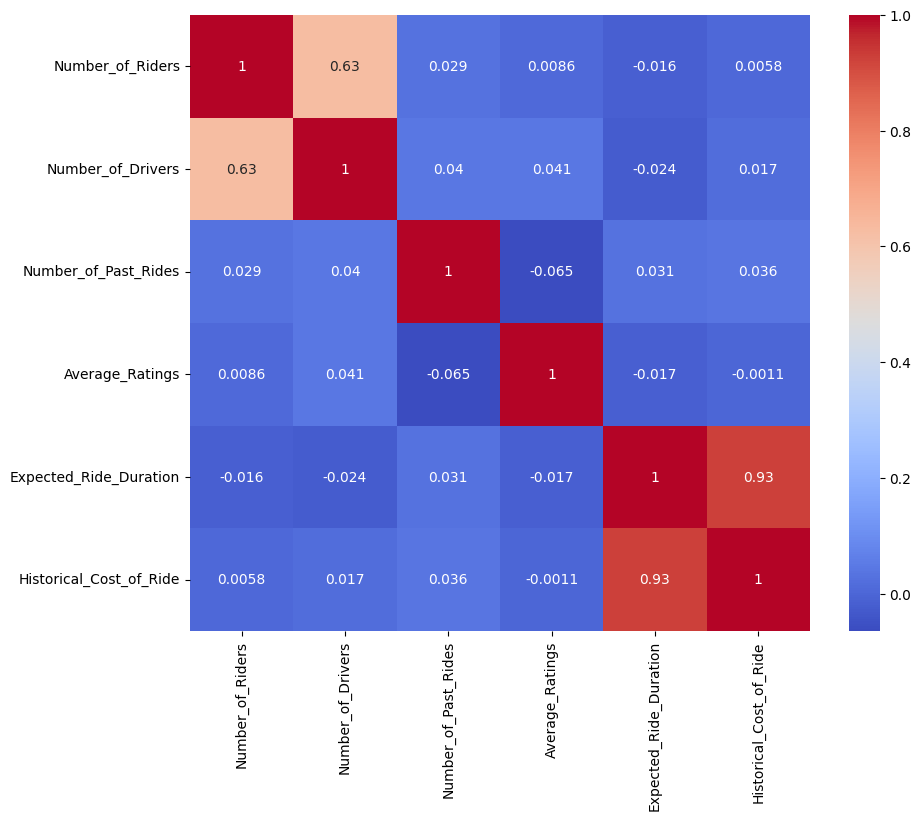

In [ ]:
num_df = df.select_dtypes(include=[int,float])
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df['Location_Category'].value_counts()

,count
Location_Category,
Urban,346
Rural,332
Suburban,322


In [ ]:
df['Customer_Loyalty_Status'].value_counts()

,count
Customer_Loyalty_Status,
Silver,367
Regular,320
Gold,313


In [ ]:
df['Time_of_Booking'].value_counts()

,count
Time_of_Booking,
Night,276
Afternoon,247
Morning,246
Evening,231


In [ ]:
df['Vehicle_Type'].value_counts()

,count
Vehicle_Type,
Premium,522
Economy,478


<ipython-input-20-37bbce07d23e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location_Category', data=df, palette='magma');


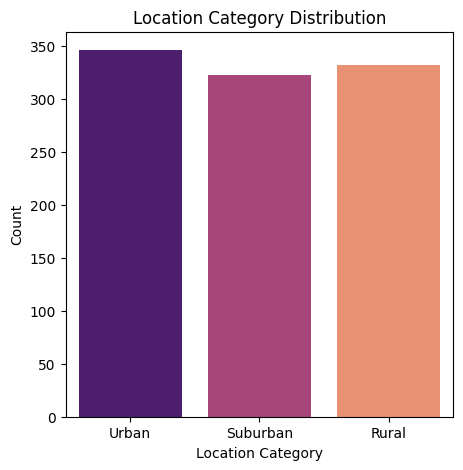

In [ ]:
plt.figure(figsize=(5, 5));
sns.countplot(x='Location_Category', data=df, palette='magma');
plt.title('Location Category Distribution');
plt.xlabel('Location Category');
plt.ylabel('Count');
plt.show();

<ipython-input-21-9230e06c9121>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Time_of_Booking', data=df, palette='magma');


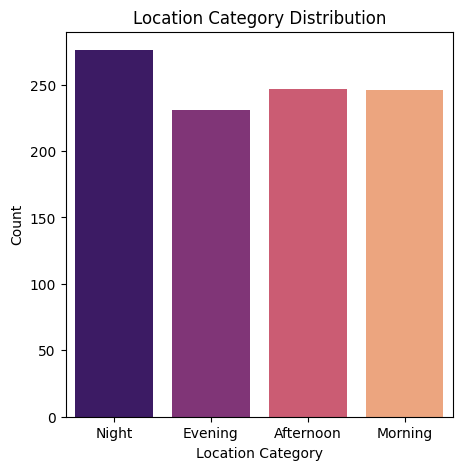

In [ ]:
plt.figure(figsize=(5, 5));
sns.countplot(x='Time_of_Booking', data=df, palette='magma');
plt.title('Location Category Distribution');
plt.xlabel('Location Category');
plt.ylabel('Count');
plt.show();

Подготовим данные для обучения модели, уберем выбросы из признака Number_of_Drivers

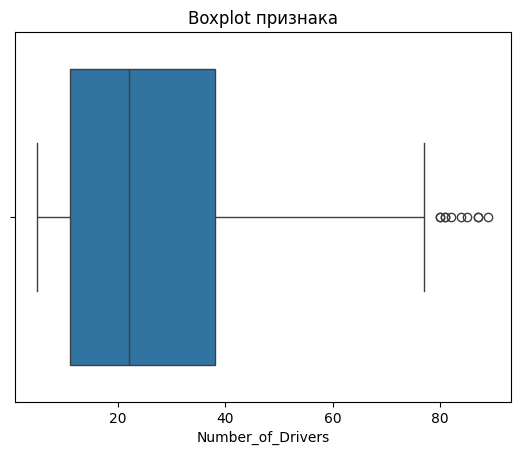

In [ ]:
sns.boxplot(x=df['Number_of_Drivers'])
plt.title('Boxplot признака')
plt.show()

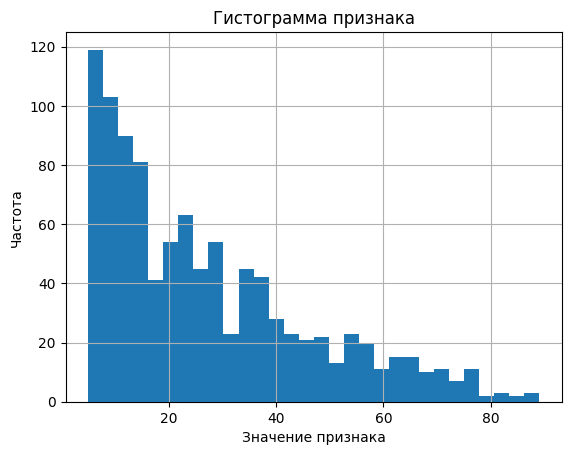

In [ ]:
df['Number_of_Drivers'].hist(bins=30)
plt.title('Гистограмма признака')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

In [ ]:
df = df[df['Number_of_Drivers'] <= 60]

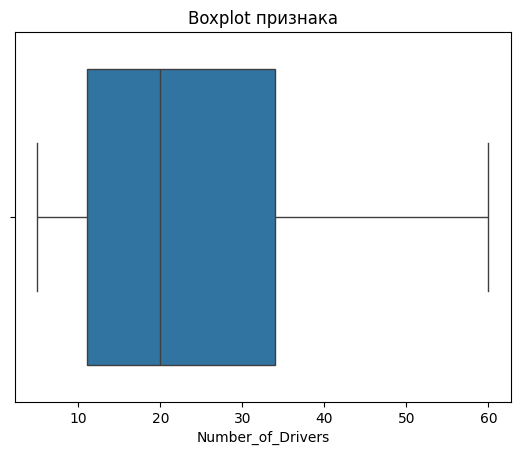

In [ ]:
sns.boxplot(x=df['Number_of_Drivers'])
plt.title('Boxplot признака')
plt.show()

Мы убрали 79 объектов с выбросами

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, 0 to 998
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         921 non-null    int64  
 1   Number_of_Drivers        921 non-null    int64  
 2   Location_Category        921 non-null    object 
 3   Customer_Loyalty_Status  921 non-null    object 
 4   Number_of_Past_Rides     921 non-null    int64  
 5   Average_Ratings          921 non-null    float64
 6   Time_of_Booking          921 non-null    object 
 7   Vehicle_Type             921 non-null    object 
 8   Expected_Ride_Duration   921 non-null    int64  
 9   Historical_Cost_of_Ride  921 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 79.1+ KB


Оставим для обучения следующие параметры: Time_of_Booking, Vehicle_Type, number_of_drivers | number_of_riders и expected_ride_duration | historical_cost_of_ride

In [ ]:
df_for_predict = df[['Time_of_Booking', 'Vehicle_Type', 'Number_of_Drivers','Number_of_Riders','Expected_Ride_Duration', 'Historical_Cost_of_Ride']]

In [ ]:
df_for_predict

,Time_of_Booking,Vehicle_Type,Number_of_Drivers,Number_of_Riders,Expected_Ride_Duration,Historical_Cost_of_Ride
0,Night,Premium,45,90,90,284.257273
1,Evening,Economy,39,58,43,173.874753
2,Afternoon,Premium,31,42,76,329.795469
3,Afternoon,Premium,28,89,134,470.201232
4,Afternoon,Economy,22,78,149,579.681422
...,...,...,...,...,...,...
994,Evening,Premium,14,33,17,118.986533
995,Morning,Premium,23,33,11,91.389526
996,Morning,Premium,29,84,94,424.155987
997,Night,Premium,6,44,40,157.364830


In [ ]:
df_for_predict = pd.get_dummies(df, columns=['Time_of_Booking', 'Customer_Loyalty_Status','Location_Category' ])

In [ ]:
df_for_predict['Vehicle_Type'] = df_for_predict['Vehicle_Type'].map({'Economy': 0, 'Premium': 1})

In [ ]:
df_for_predict.head()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Time_of_Booking_Afternoon,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Customer_Loyalty_Status_Gold,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Location_Category_Rural,Location_Category_Suburban,Location_Category_Urban
0,90,45,13,4.47,NaN,90,284.257273,False,False,False,True,False,False,True,False,False,True
1,58,39,72,4.06,NaN,43,173.874753,False,True,False,False,False,False,True,False,True,False
2,42,31,0,3.99,NaN,76,329.795469,True,False,False,False,False,False,True,True,False,False
3,89,28,67,4.31,NaN,134,470.201232,True,False,False,False,False,True,False,True,False,False
4,78,22,74,3.77,NaN,149,579.681422,True,False,False,False,False,True,False,True,False,False


In [ ]:
X = df_for_predict.drop("Historical_Cost_of_Ride", axis=1)
y = df_for_predict["Historical_Cost_of_Ride"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y numpy catboost

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: catboost 1.2.8
Uninstalling catboost-1.2.8:
  Successfully uninstalled catboost-1.2.8


In [ ]:
!pip install --no-cache-dir numpy catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 171.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 104.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [ ]:
from catboost import CatBoostRegressor
param_grid = {
    'iterations': [200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 10],
    'border_count': [32, 64, 128],
}

In [ ]:
cat_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=200)

In [ ]:
catboost_grid_search = GridSearchCV(cat_model, param_grid, cv=3)

In [ ]:
catboost_grid_search.fit(X_train, y_train)

0:	learn: 183.8824580	total: 47ms	remaining: 9.36s
199:	learn: 73.3609253	total: 89.1ms	remaining: 0us
0:	learn: 179.4050436	total: 342us	remaining: 68.1ms
199:	learn: 72.4784313	total: 49.2ms	remaining: 0us
0:	learn: 187.2403711	total: 324us	remaining: 64.5ms
199:	learn: 73.2724993	total: 41.6ms	remaining: 0us
0:	learn: 178.3911335	total: 378us	remaining: 75.4ms
199:	learn: 46.5413128	total: 41.3ms	remaining: 0us
0:	learn: 173.8422158	total: 324us	remaining: 64.6ms
199:	learn: 45.6573489	total: 40.3ms	remaining: 0us
0:	learn: 181.3037830	total: 357us	remaining: 71.2ms
199:	learn: 46.6306692	total: 43.4ms	remaining: 0us
0:	learn: 171.6077639	total: 356us	remaining: 70.9ms
199:	learn: 33.7899894	total: 38.4ms	remaining: 0us
0:	learn: 166.9636990	total: 358us	remaining: 71.4ms
199:	learn: 33.5545973	total: 38.1ms	remaining: 0us
0:	learn: 173.9567172	total: 346us	remaining: 68.9ms
199:	learn: 33.7642536	total: 41.2ms	remaining: 0us
0:	learn: 183.9411909	total: 365us	remaining: 72.7ms
199:

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7e7bb2517e50>,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8],
                         'iterations': [200, 500], 'l2_leaf_reg': [1, 3, 5, 10],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
y_pred = catboost_grid_search.predict(X_test)

In [ ]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("y_test[:5]:", y_test.values[:5])
print("y_pred[:5]:", y_pred[:5])

y_test shape: (277,)
y_pred shape: (277,)
y_test[:5]: [624.98601003 477.74113617 383.31780422 108.60235646 306.31424323]
y_pred[:5]: [556.48670492 424.56939331 311.61811544 112.43361169 363.73451413]


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE:  {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2:   {r2:.3f}')
print(f"MAPE: {mape * 100:.2f}%")

MAE:  52.88
RMSE: 68.60
R2:   0.860
MAPE: 15.68%


In [ ]:
import joblib
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [ ]:
def preprocess_data(df):
    df = df.copy()
    df = df[df['Number_of_Drivers'] <= 60]
    df = pd.get_dummies(df, columns=['Time_of_Booking', 'Customer_Loyalty_Status','Location_Category' ])
    df['Vehicle_Type'] = df['Vehicle_Type'].map({'Economy': 0, 'Premium': 1})
    return df

preprocessor = FunctionTransformer(preprocess_data)
best_model = catboost_grid_search.best_estimator_

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", best_model)
])

In [ ]:
joblib.dump(pipeline, "ride_cost_model.pkl")

['ride_cost_model.pkl']

In [ ]:
from google.colab import files
files.download("ride_cost_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>